## 38 - Making a Hodograph

[Youtube](https://www.youtube.com/watch?v=c0Uc7imDNv0)

In [1]:
from datetime import datetime
import matplotlib.pyplot as plt
import metpy.calc as mpcalc
from metpy.plots import Hodograph
from metpy.units import units
from siphon.simplewebservice.wyoming import WyomingUpperAir

%matplotlib inline

In [2]:
date = datetime(1999, 5, 4)
station = 'OUN'

In [3]:
df = WyomingUpperAir.request_data(date, station)
df.columns

Index(['pressure', 'height', 'temperature', 'dewpoint', 'direction', 'speed',
       'u_wind', 'v_wind', 'station', 'station_number', 'time', 'latitude',
       'longitude', 'elevation', 'pw'],
      dtype='object')

In [4]:
pressure = df['pressure'].values * units(df.units['pressure'])
u_wind = df['u_wind'].values * units(df.units['u_wind'])
v_wind = df['v_wind'].values * units(df.units['v_wind'])
heights = df['height'].values * units(df.units['height'])

In [6]:
print(mpcalc.wind_direction(u_wind, v_wind))

[160.0 165.0 165.0 175.0 178.0 190.0 195.0 204.0 205.0 211.0 215.0 215.0 220.0 220.0 220.0 220.0 225.0 220.0 220.0 225.0 235.0 235.0 235.0 235.0 235.0 239.99999999999997 239.99999999999997 245.00000000000003 245.00000000000003 250.00000000000003 nan] degree


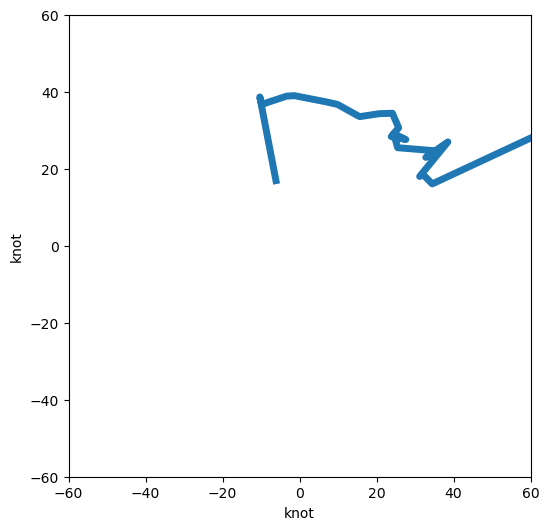

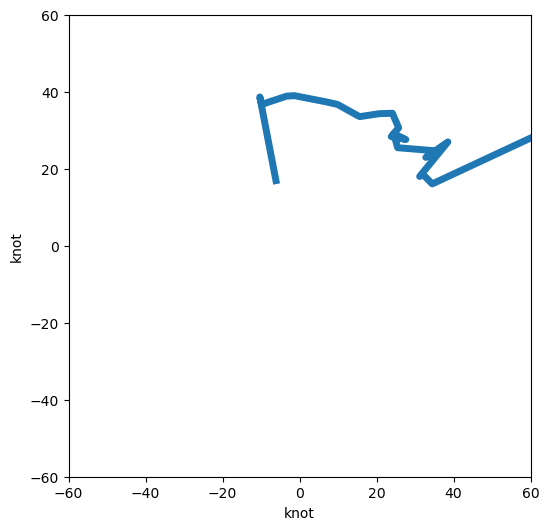

In [7]:
fig = plt.figure(figsize = (6, 6))
ax = fig.add_subplot(1, 1, 1)
h = Hodograph(ax, component_range = 60.)

h.plot(u_wind, v_wind, linewidth = 5)
fig

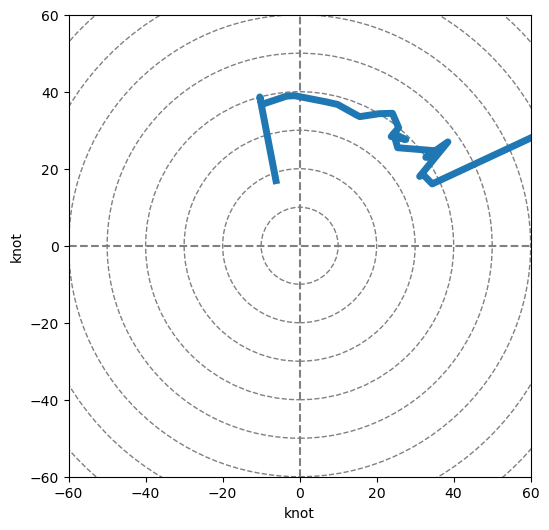

In [8]:
h.add_grid(increment = 10)
fig

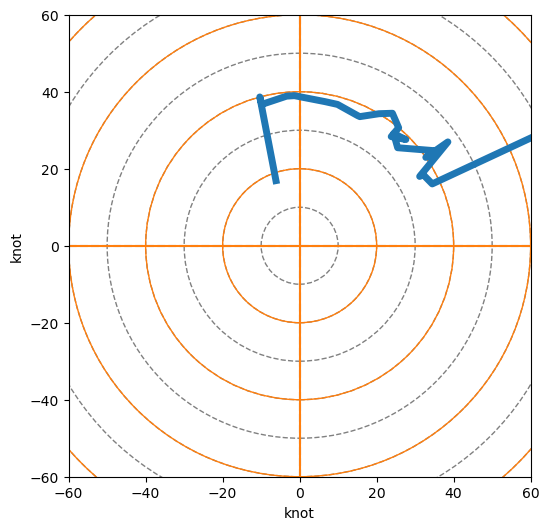

In [9]:
h.add_grid(increment = 20, color = 'tab:orange', linestyle = '-')
fig

In [10]:
p_4km, u_4km, v_4km = mpcalc.get_layer(pressure, u_wind, v_wind, height = heights, depth = 4*units.km)

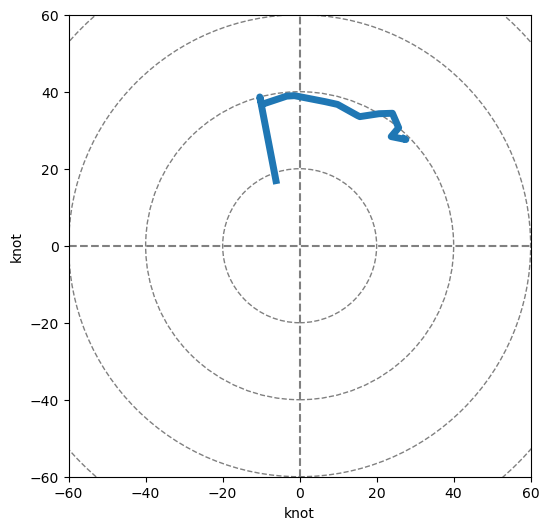

In [11]:
fig = plt.figure(figsize = (6, 6))
ax = fig.add_subplot(1, 1, 1)
h = Hodograph(ax, component_range = 60.)
h.plot(u_4km, v_4km, linewidth = 5)
h.add_grid(increment = 20)